# Spotify Song Data Analysis
## Introduction
This is my capstone 2, spotify song database
## Importing Libraries

In [130]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
plt.style.use('seaborn-pastel');
import sklearn as sk;
import seaborn as sns;


## Reading the dataset

In [131]:
df = pd.read_csv('data\data.csv'); # Main dataset - Row is song
dfArtist = pd.read_csv('data\data_by_artist.csv'); # Row is artist
dfGenre = pd.read_csv('data\data_by_genres.csv'); # Row is genre
dfYear = pd.read_csv('data\data_by_year.csv'); # Row is year
dfWGenres = pd.read_csv('data\data_w_genres.csv'); # Row is artist

## Understanding the Categories
### Content
The "data.csv" file contains more than 170.000 songs collected from Spotify Web API, and also you can find data grouped by artist, year, or genre in the other datasets.

### Primary:
- id (Id of track generated by Spotify)
### Numerical:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)
### Dummy:
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)
### Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- artists (List of artists mentioned)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

## First look at the dataset

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [133]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [134]:
df.describe().round(decimals=2);

There are a total of 170653 songs in the dataset; there are 15 numerical categories and 3 categorical categories (name, artist, release_date)

## Data Cleansing

In [135]:
dfClean = df
dfClean['artists'] = df['artists'].str.replace("'","");
dfClean['artists'] = df['artists'].str.replace("[","");
dfClean['artists'] = df['artists'].str.replace("]","");

In [136]:
dfClean.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


Reorder Columns

In [137]:
oldColumns = dfClean.columns.tolist()
oldColumns

['valence',
 'year',
 'acousticness',
 'artists',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'id',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'name',
 'popularity',
 'release_date',
 'speechiness',
 'tempo']

In [138]:
newCol = [
    'id', # Begin with categorical attributes of the song
    'name', 
    'artists',
    'release_date',
    'popularity', # Non accounstic attributes
    'year',
    'duration_ms',
    'valence', # Accoustic attributes
    'acousticness',
    'danceability',
    'energy',
    'explicit',
    'instrumentalness',
    'key',
    'liveness',
    'loudness',
    'mode',
    'speechiness',
    'tempo'
];

In [139]:
dfClean = dfClean[newCol]
dfClean.head()

,id,name,artists,release_date,popularity,year,duration_ms,valence,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","Sergei Rachmaninoff, James Levine, Berliner Ph...",1921,4,1921,831667,0.0594,0.982,0.279,0.211,0,0.878000,10,0.665,-20.096,1,0.0366,80.954
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,Dennis Day,1921,5,1921,180533,0.9630,0.732,0.819,0.341,0,0.000000,7,0.160,-12.441,1,0.4150,60.936
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,1921,5,1921,500062,0.0394,0.961,0.328,0.166,0,0.913000,3,0.101,-14.850,1,0.0339,110.339
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,Frank Parker,1921,3,1921,210000,0.1650,0.967,0.275,0.309,0,0.000028,5,0.381,-9.316,1,0.0354,100.109
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,Phil Regan,1921,2,1921,166693,0.2530,0.957,0.418,0.193,0,0.000002,3,0.229,-10.096,1,0.0380,101.665


## Dat Visualizations
In the next section I visualize the data through various types of methods

### Distribution Visualization
I begin with a simple histogram of each numerical category in the dataset. 


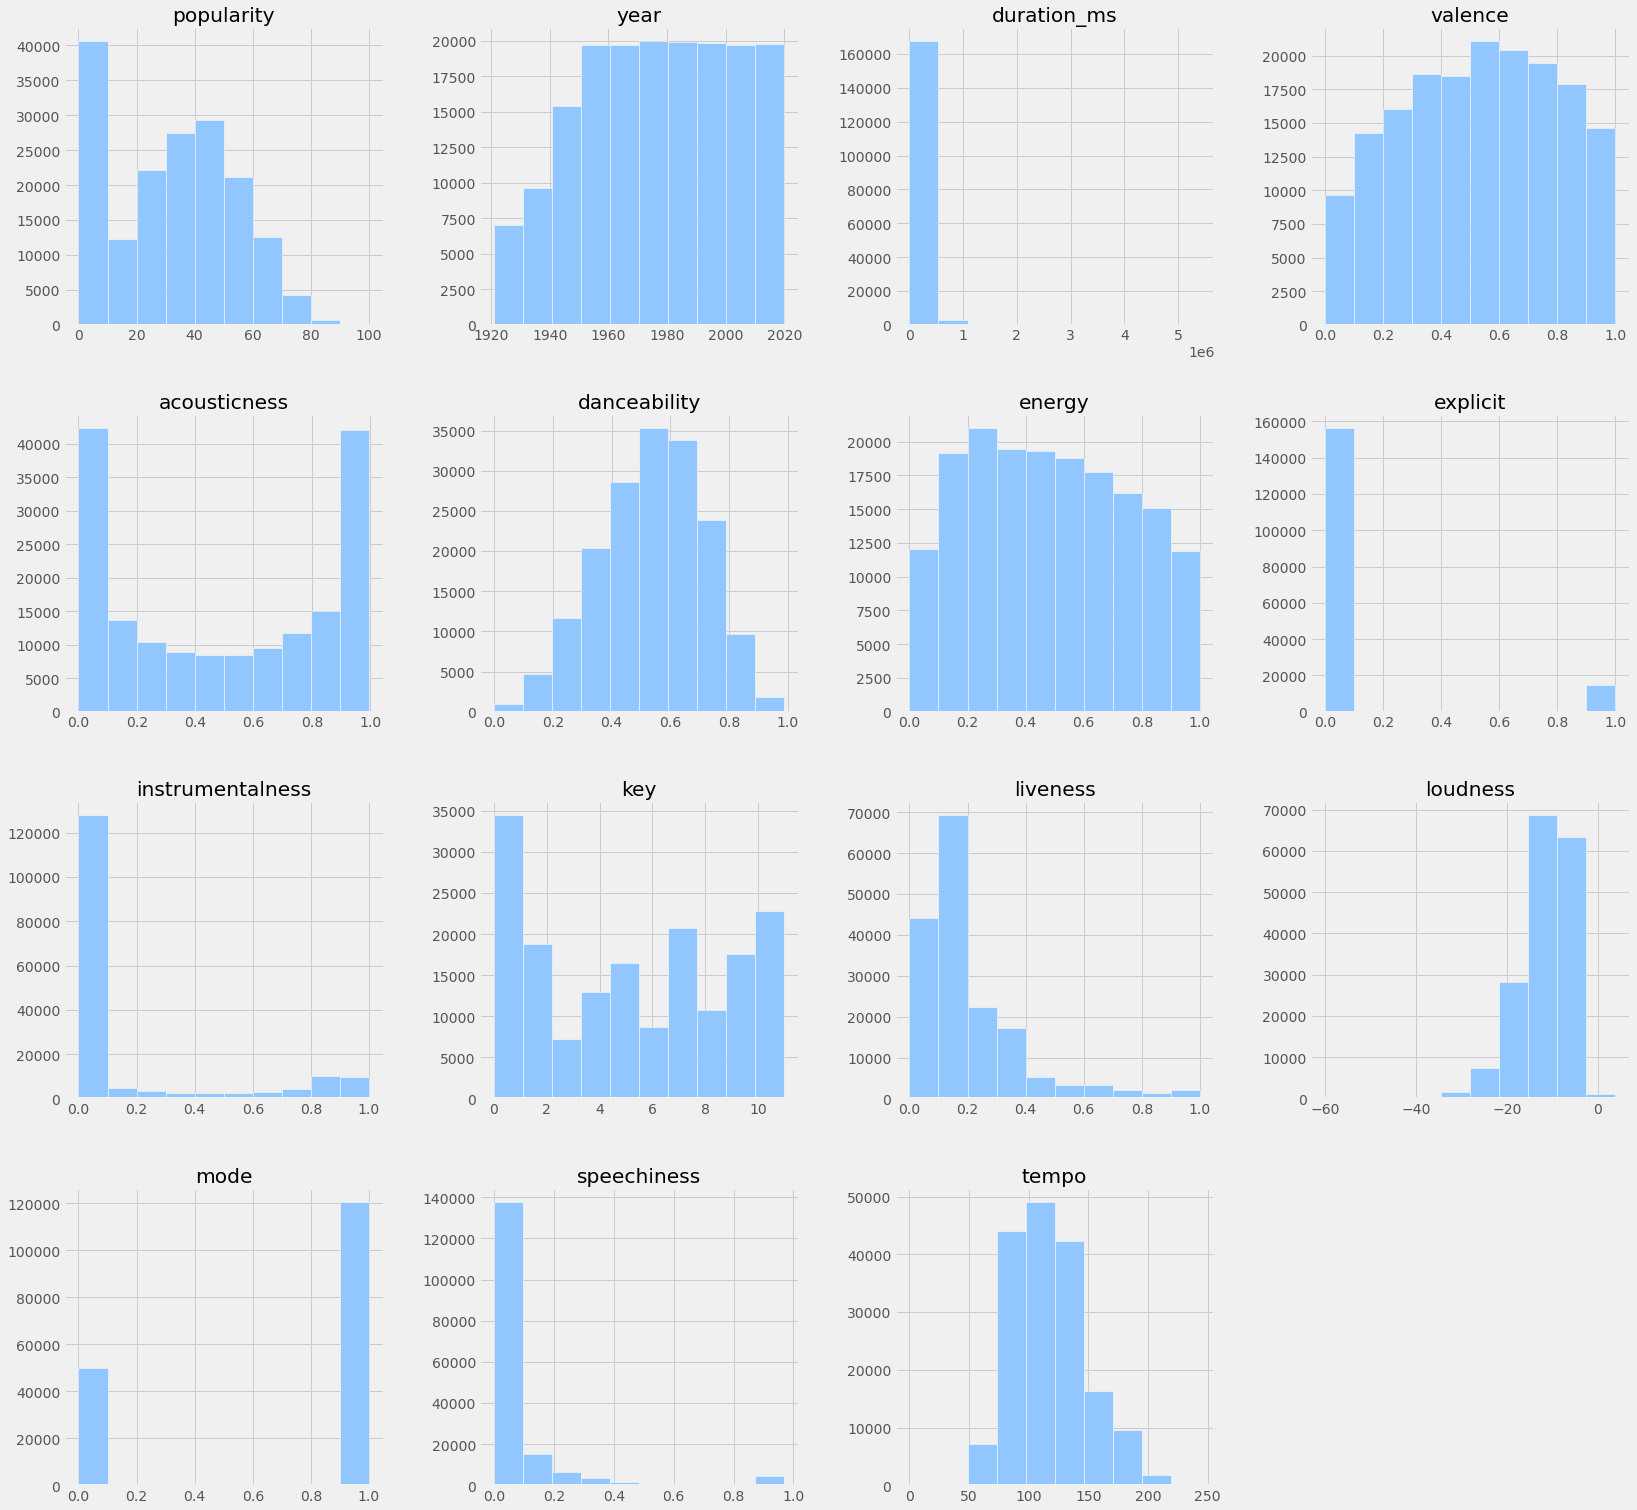

In [140]:
dfClean.hist(figsize=(25,25), edgecolor='#FFFFFF')
plt.show()

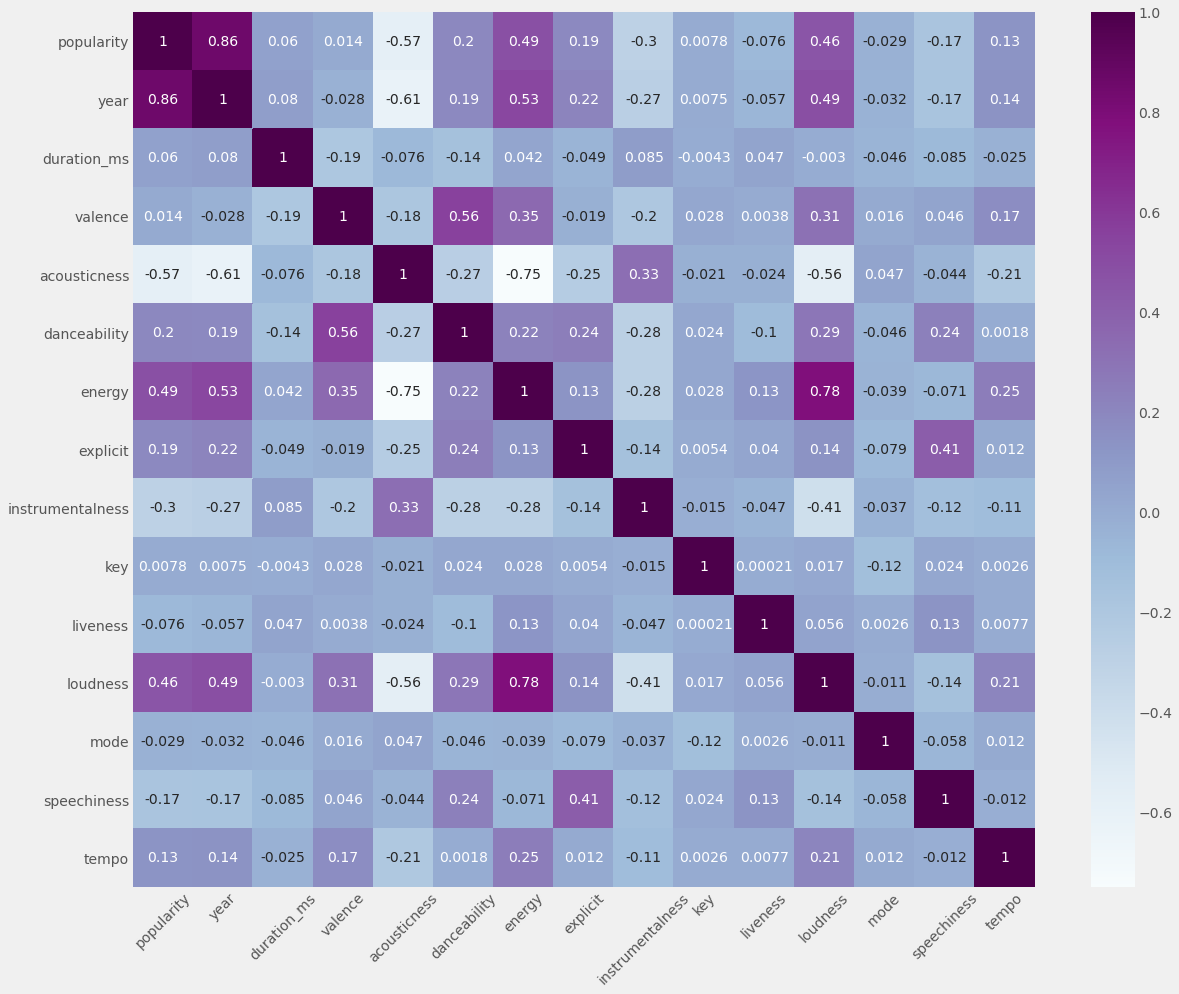

In [141]:
fig, ax = plt.subplots(figsize=(18,15))
ax = sns.heatmap(
    dfClean.corr(),
    cmap='BuPu',
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45
)
plt.show()